In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.data_extractor import download_single_ticker_forex_data
from utils.trainable_df import CreateTrainableDf

In [2]:
ticker1 = 'EUR'
ticker2 = 'INR'

In [3]:
eur_to_inr = download_single_ticker_forex_data(ticker1, ticker2)

/Users/arjunprakashrao/Drive/projects/forex-agent/utils/data_extractor.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  forex_data = yf.download(ticker_full, start='2000-01-02', end='2025-10-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
eur_to_inr

,EUR_INR
Date,
2003-12-01,54.700001
2003-12-02,55.139000
2003-12-03,55.181000
2003-12-04,55.000999
2003-12-05,55.370998
...,...
2025-08-27,101.920998
2025-08-28,102.009003
2025-08-29,102.233002


In [5]:
config = {
    "lag":2,
    "price_col":f"{ticker1}_{ticker2}"
}

In [6]:
trainable_df = CreateTrainableDf(exchange_df=eur_to_inr, config=config)
trainable_df.create_trainable_df()
eur_to_inr = trainable_df.df

In [7]:
eur_to_inr

,EUR_INR,EUR_INR_lag_1,EUR_INR_lag_2,target
Date,,,,
2003-12-03,55.181000,55.139000,54.700001,0
2003-12-04,55.000999,55.181000,55.139000,1
2003-12-05,55.370998,55.000999,55.181000,0
2003-12-08,55.563999,55.370998,55.000999,0
2003-12-09,55.653999,55.563999,55.370998,0
...,...,...,...,...
2025-08-27,101.920998,101.669998,100.411003,0
2025-08-28,102.009003,101.920998,101.669998,0
2025-08-29,102.233002,102.009003,101.920998,0


# Graphs

<Axes: xlabel='Date'>

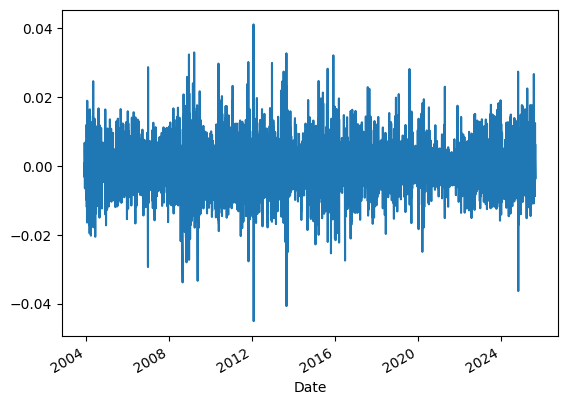

In [10]:
eur_to_inr['log_returns'].plot()

In [11]:
eur_to_inr.sum(), eur_to_inr.mean(), eur_to_inr.std()

(EUR_INR          412149.044167
 EUR_INR_lag_1    412101.721970
 EUR_INR_lag_2    412054.574970
 log_returns           0.619627
 dtype: float64,
 EUR_INR          73.050167
 EUR_INR_lag_1    73.041780
 EUR_INR_lag_2    73.033423
 log_returns       0.000110
 dtype: float64,
 EUR_INR          12.160686
 EUR_INR_lag_1    12.156716
 EUR_INR_lag_2    12.153116
 log_returns       0.006859
 dtype: float64)

# Time series analysis

In [12]:
from statsmodels.tsa.stattools import adfuller
from models.time_series import time_series as ts

In [13]:
# Using ADF test to check for stationarity
eur_to_inr_list = eur_to_inr['log_returns'].to_list()
ad_stats = adfuller(eur_to_inr_list, regression='ct', autolag='BIC')
ad_stats

(np.float64(-33.348904053124755),
 0.0,
 4,
 5637,
 {'1%': np.float64(-3.9603769092300802),
  '5%': np.float64(-3.411269138621297),
  '10%': np.float64(-3.1275088073437405)},
 np.float64(-40072.128342371354))

In [17]:
forecast = ts.arima_train_and_pred(eur_to_inr['log_returns'], pred_period=1)

/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model

In [18]:
eur_to_inr['log_returns']

Date
2003-12-03    0.000761
2003-12-04   -0.003267
2003-12-05    0.006705
2003-12-08    0.003480
2003-12-09    0.001618
                ...   
2025-08-27    0.002466
2025-08-28    0.000863
2025-08-29    0.002193
2025-09-01   -0.003783
2025-09-02    0.006012
Name: log_returns, Length: 5642, dtype: float64

In [19]:
forecast

1

In [20]:
backfill_arima = ts.backtest_arima(eur_to_inr['log_returns'][0:300])

/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be s

Accuracy of direction changes: 0.4844290657439446


/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
backfill_arima

,original,predicted
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
284,0,0
285,0,0
286,0,1
287,1,0


<Axes: >

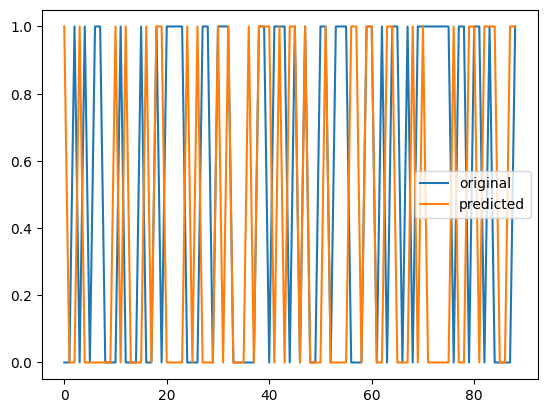

In [17]:
backfill_arima.plot()